# Modelos de regresión lineal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = 1.5 + 2.5 *np.random.randn(100)

In [ ]:
res = 0 + 0.8 *np.random.randn(100)

In [ ]:
y_pred = 5 + 1.9* x


In [ ]:
y_act = 5 + 1.9* x + res

In [ ]:
x_lis = x.tolist()
y_pred_lis = y_pred.tolist()
y_act_lis = y_act.tolist()

In [ ]:
df = pd.DataFrame({'x':x_lis,
                   'y_pred':y_pred_lis,
                   'y_act':y_act_lis})

In [ ]:
df.head()

,x,y_pred,y_act
0,0.680161,6.292306,6.775823
1,1.181551,7.244947,7.229003
2,-0.095731,4.818111,4.555507
3,1.191746,7.264317,7.056391
4,2.939796,10.585612,10.288104


In [ ]:
y_mean = [np.mean(y_act) for i in range(1, + len(x_lis)+1)]

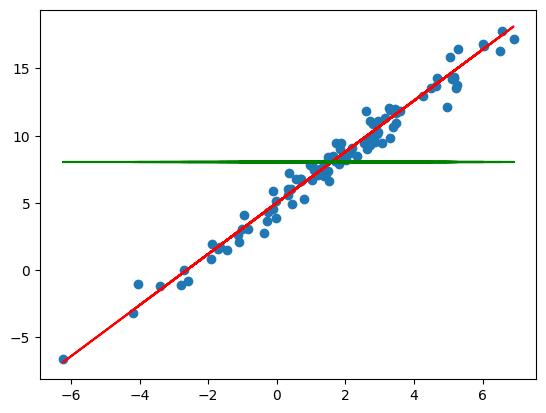

In [ ]:
plt.plot(x,y_pred,color='red')
plt.scatter(x,y_act)
plt.plot(x,y_mean,color='green')
plt.show()

In [ ]:
df['SSR'] = (y_pred - y_mean)**2
df['SST'] = (y_act - y_mean)**2
df['SSD'] = (y_act - y_pred)**2


In [ ]:
df.head()

,x,y_pred,y_act,SSR,SST,SSD
0,0.680161,6.292306,6.775823,3.048039,1.593518,0.233789
1,1.181551,7.244947,7.229003,0.629201,0.654750,0.000254
2,-0.095731,4.818111,4.555507,10.368775,12.128936,0.068961
3,1.191746,7.264317,7.056391,0.598847,0.963887,0.043233
4,2.939796,10.585612,10.288104,6.489464,5.062206,0.088511


In [ ]:
SSR = sum(df['SSR'])
SSR

2282.850946138277

In [ ]:
SST = sum(df['SST'])

SST

2256.7306407799974

In [ ]:
SSD = sum(df['SSD'])
SSD

58.424178341310615

In [ ]:
r2 = SSR/SST
r2

1.0115744009879937

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y_act)
x_mean, y_mean

(1.6521710235258091, 8.038169150363178)

In [ ]:
df['beta_n']= (df['x']-x_mean)*(df['y_act']-y_mean)
df['beta_d']= (df['x']-x_mean)**2

In [ ]:
beta = sum(df['beta_n'])/sum(df['beta_d'])
beta

1.8656500676975454

In [ ]:
alpha = y_mean - beta*x_mean
alpha


4.955796168474329

In [ ]:
df['y_modelo'] = alpha + beta*df['x']
df.head()

,x,y_pred,y_act,SSR,SST,SSD,beta_n,beta_d,y_modelo
0,0.680161,6.292306,6.775823,3.048039,1.593518,0.233789,1.227013,0.944804,6.224739
1,1.181551,7.244947,7.229003,0.629201,0.654750,0.000254,0.380810,0.221483,7.160157
2,-0.095731,4.818111,4.555507,10.368775,12.128936,0.068961,6.087352,3.055162,4.777195
3,1.191746,7.264317,7.056391,0.598847,0.963887,0.043233,0.452035,0.211991,7.179177
4,2.939796,10.585612,10.288104,6.489464,5.062206,0.088511,2.897071,1.657977,10.440426


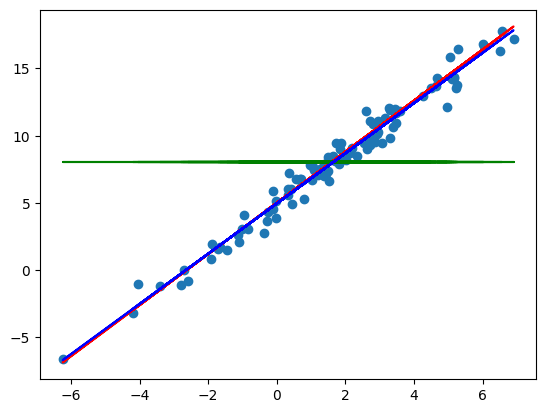

In [ ]:
y_mean = [np.mean(y_act) for i in range(1, + len(x_lis)+1)]
plt.plot(df['x'],y_pred,color='red')
plt.scatter(df['x'],y_act)
plt.plot(df['x'],y_mean,color='green')
plt.plot(df['x'],df['y_modelo'],color='blue')
plt.show()

# Regresión lineal con stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
url = 'https://raw.githubusercontent.com/Afgcc132/python-ml-course/master/datasets/ads/Advertising.csv'
df = pd.read_csv(url)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV', data=df).fit()

lm.params

,0
Intercept,7.032594
TV,0.047537


In [ ]:
lm.pvalues

,0
Intercept,1.406300e-35
TV,1.467390e-42


In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
lm.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        14:00:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm.predict(pd.DataFrame(df[['TV']]))
sales_pred

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218
...,...
195,8.848493
196,11.510545
197,15.446579
198,20.513985


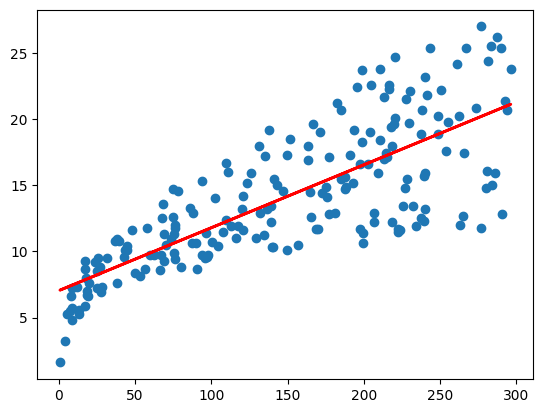

In [ ]:
plt.scatter(x='TV',y='Sales',data=df)
plt.plot(df['TV'], sales_pred,color='red',linewidth=2)
plt.show()

In [ ]:
df['sales_predic']= 7.032594+	0.047537* df['TV']
df['RSE']= (df['sales_predic'] - df['Sales'])**2



In [ ]:
SSD = sum(df['RSE'])
SSD

2102.5305838896525

In [ ]:
RSE = np.sqrt(SSD/(len(df)-2))
RSE

3.258656369238098

In [ ]:
sales_mean = np.mean(df['Sales'])
sales_mean

14.0225

In [ ]:
Error = RSE/sales_mean
Error

0.23238768901680143

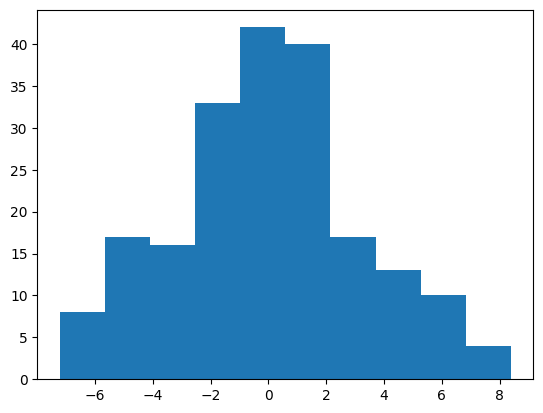

In [ ]:
plt.hist(df['sales_predic'] - df['Sales'])
plt.show()

# Modelos de regresión lineal Multiple

In [ ]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='Sales ~ TV  + Newspaper', data=df).fit()
lm2.params

,0
Intercept,5.774948
TV,0.046901
Newspaper,0.044219


In [ ]:
lm2.pvalues

,0
Intercept,3.145860e-22
TV,5.507584e-44
Newspaper,2.217084e-05


In [ ]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           3.95e-45
Time:                        16:58:16   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm2.rsquared

0.6458354938293271

In [ ]:
sales_pred2 = lm2.predict(pd.DataFrame(df[['TV','Newspaper']]))
sales_pred2

,0
0,19.626901
1,9.856348
2,9.646055
3,15.467318
4,16.837102
...,...
195,8.176802
196,10.551220
197,14.359467
198,22.003458


In [ ]:
df['RSE2']= (sales_pred2 - df['Sales'])**2
SSD2 = sum(df['RSE2'])
SSD2

1918.561811896827

In [ ]:
RSE = np.sqrt(SSD2/(len(df)-3))
RSE

3.120719860252885

In [ ]:
RSE2 = np.sqrt(lm2.mse_resid)
RSE2

3.120719860252886

In [ ]:
sales_mean = np.mean(df['Sales'])
Error = RSE/sales_mean
Error

0.2225508903728212

In [ ]:
lm3 = smf.ols(formula='Sales ~ TV  + Radio', data=df).fit()
lm3.params

,0
Intercept,2.921100
TV,0.045755
Radio,0.187994


In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           4.83e-98
Time:                        17:13:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
RSE3 = np.sqrt(lm3.mse_resid)
RSE3

1.681360912508001

In [ ]:
Error = RSE3/sales_mean
Error

0.1199045043685506

In [ ]:
lm4 = smf.ols(formula='Sales ~ TV  + Radio + Newspaper', data=df).fit()
lm4.params

,0
Intercept,2.938889
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [ ]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        17:24:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicolinealidad

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
lm_n = smf.ols(formula='Newspaper ~ TV  + Radio  ', data=df).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [ ]:
lm_n = smf.ols(formula='TV   ~  Newspaper + Radio  ', data=df).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.00461078493965

In [ ]:
lm_n = smf.ols(formula=' Radio   ~  TV  + Newspaper  ', data=df).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1449519171055353

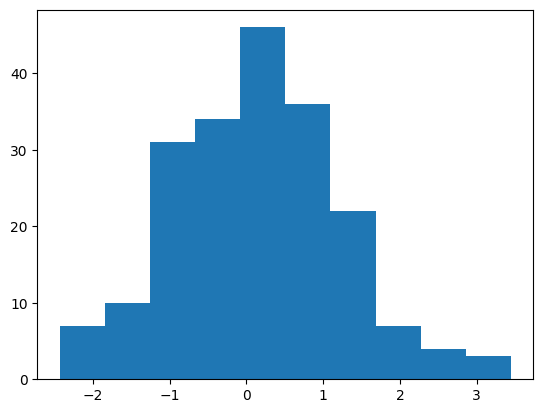

In [ ]:
a = np.random.randn(len(df))
plt.hist(a)
plt.show()

In [ ]:
check = (a<0.8)
training = df[check]
testing = df[~check]


In [ ]:
len(training), len(testing)

(148, 52)

In [ ]:
lm = smf.ols(formula='Sales ~ TV  + Radio', data=training).fit()


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     568.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.40e-69
Time:                        19:20:22   Log-Likelihood:                -290.23
No. Observations:                 148   AIC:                             586.5
Df Residuals:                     145   BIC:                             595.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8421      0.372      7.637      0.000       2.107       3.578
TV             0.0456      0.002     26.783      0.000       0.042       0.049
Radio          0.1900      0.010     19.666      0.000       0.171       0.209
==============================================================================
Omnibus:                       54.224   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.927
Skew:                          -1.461   Prob(JB):                     1.69e-33
Kurtosis:                       6.992   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm.predict(testing)
sales_pred


,0
0,20.519339
2,12.347060
4,13.140910
6,11.696457
7,12.048605
12,10.596244
16,12.888233
22,6.464973
25,15.498893
29,9.102204


In [ ]:
SSD = sum((testing['Sales']- sales_pred )**2)
SSD

120.07054315305182

In [ ]:
RSE = np.sqrt(SSD/(len(testing)-3))
RSE

1.5653815023889435

In [ ]:
sales_mean = np.mean(testing['Sales'])
sales_mean

12.93269230769231

In [ ]:
Error = RSE/sales_mean
Error


0.1210406514858365

# Modelos lineales con Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/master/datasets/ads/Advertising.csv"
df = pd.read_csv(url)
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
feautures_cols = ['TV','Radio','Newspaper']
X= df[feautures_cols]
Y = df['Sales']

In [ ]:
estimator = SVR(kernel='linear')

selector = RFE(estimator, n_features_to_select=2, step=1)

selector = selector.fit(X,Y)

In [ ]:
selector.support_

array([ True,  True, False])

In [ ]:
X_pred = X[['TV','Radio']]
X_pred.head()


,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [ ]:
lm = LinearRegression()
lm.fit(X_pred,Y)

LinearRegression()

In [ ]:
lm.coef_

array([0.04575482, 0.18799423])

In [ ]:
lm.score(X_pred,Y)

0.8971942610828957

# Tratamiento de variables categoricas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/ecom-expense/Ecom%20Expense.csv"
df = pd.read_csv(url)
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [ ]:
dummy_gender = pd.get_dummies(df['Gender'],prefix='Gender', dtype=int)
dummy_city_tier = pd.get_dummies(df['City Tier'],prefix='City', dtype=int)

In [ ]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
columns = df.columns.values.tolist()
columns

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [ ]:
df_new = df[columns].join(dummy_gender)
df_new.head()


,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [ ]:
columns = df_new.columns.values.tolist()
columns


['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [ ]:
df_new = df_new[columns].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [ ]:
feature_columns = ['Monthly Income','Transaction Time','Gender_Female','Gender_Male','City_Tier 1','City_Tier 2','City_Tier 3']


In [ ]:
X = df_new[feature_columns]
Y = df_new['Total Spend']

In [ ]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [ ]:
lm.score(X,Y)

0.19478920552885381

In [ ]:
lm.intercept_

3655.729407690651

In [ ]:
lm.coef_

array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
        119.6632516 ,  -16.67901801, -102.9842336 ])

In [ ]:
feature_columns = ['Monthly Income','Transaction Time','Gender_Female','Gender_Male','City_Tier 1','City_Tier 2','City_Tier 3', 'Record']
X = df_new[feature_columns]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.9179923586131016

In [ ]:
lm.intercept_

-79.41713030137362

In [ ]:
list(zip(feature_columns, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -131.02501325554573),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049486),
 ('City_Tier 2', 55.138974309232765),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445643)]

In [ ]:
df_new['prediction']= -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']*0.15494612549580557+ df_new['Gender_Female']*-131.02501325554597 + df_new['Gender_Male']*131.02501325554597 +df_new['City_Tier 1']*76.76432601049522 + df_new['City_Tier 2']*55.13897430923272 +df_new['City_Tier 3']* -131.90330031972772+ df_new['Record']*772.233445

In [ ]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696716
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434823
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082502
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012991
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980333


In [ ]:

import seaborn as sns
import numpy as np

In [ ]:
SSD = np.sum((df_new['prediction'] -df_new['Total Spend'] )**2)
SSD

1517733985.3408167

In [ ]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_columns)-1))
RSE


803.1318809818166

In [ ]:
Sales_mean = np.mean(df_new['Total Spend'])
Sales_mean

6163.176415976715

In [ ]:
Error = RSE/Sales_mean
Error*100

13.03113568029416

# Transformación de variables para modelos no lineales



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/auto/auto-mpg.csv"
df = pd.read_csv(url)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
df.shape


(406, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
filas_con_nulos = df[df.isnull().any(axis=1)]

print(filas_con_nulos)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
10    NaN          4         133.0       115.0    3090          17.5   
11    NaN          8         350.0       165.0    4142          11.5   
12    NaN          8         351.0       153.0    4034          11.0   
13    NaN          8         383.0       175.0    4166          10.5   
14    NaN          8         360.0       175.0    3850          11.0   
17    NaN          8         302.0       140.0    3353           8.0   
38   25.0          4          98.0         NaN    2046          19.0   
39    NaN          4          97.0        48.0    1978          20.0   
133  21.0          6         200.0         NaN    2875          17.0   
337  40.9          4          85.0         NaN    1835          17.3   
343  23.6          4         140.0         NaN    2905          14.3   
361  34.5          4         100.0         NaN    2320          15.8   
367   NaN          4         121.0       110.0    2800          

In [ ]:
df = df.dropna()


In [ ]:
df.shape

(392, 9)

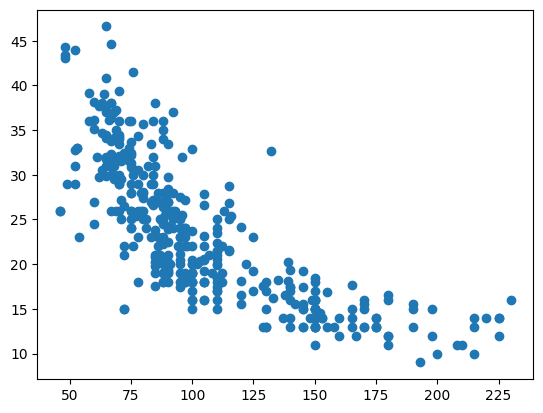

In [ ]:
plt.scatter(df['horsepower'],df['mpg'])
plt.show()

Modelo lineal

In [ ]:
X = df[['horsepower']]
Y = df['mpg']


In [ ]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [ ]:
lm.score(X,Y)

0.6059482578894348

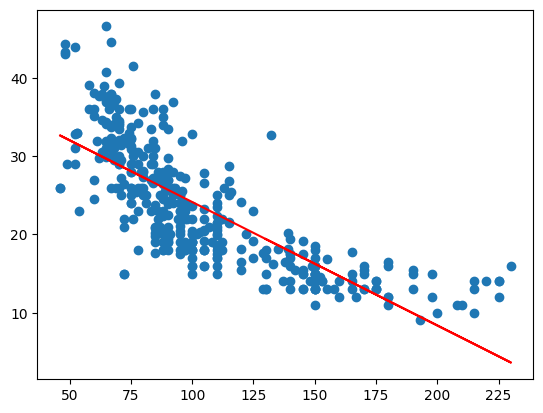

In [ ]:
plt.plot(X,lm.predict(X),color='red')
plt.scatter(df['horsepower'],df['mpg'])
plt.show()

In [ ]:
SSD = sum((Y - lm.predict(X))**2)
SSD

9385.91587193242

In [ ]:
RSE = np.sqrt(SSD/(len(df)-2))
RSE

4.90575691954594

In [ ]:
Error = RSE/np.mean(Y)
Error

0.20923714066914834

modelo de regresión cuadratico

In [ ]:
X = X**2



In [ ]:
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression()

In [ ]:
lm2.score(X,Y)

0.3110830048388751

In [ ]:
SSD = sum((Y - lm2.predict(X))**2)
RSE = np.sqrt(SSD/(len(df)-2))
Error = RSE/np.mean(Y)
SSD, RSE, Error

(16409.309408693065, 6.486536235155263, 0.27665950778831694)

modelo de regresión lineal + cuadratico

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
lm3 = linear_model.LinearRegression()
lm3.fit(X_poly,Y)

LinearRegression()

In [ ]:
lm3.score(X_poly,Y)

0.5053215502028906

In [ ]:
for d in range(2,6):
  poly = PolynomialFeatures(degree=d)
  X_poly = poly.fit_transform(X)
  lm3 = linear_model.LinearRegression()
  lm3.fit(X_poly,Y)
  print(lm3.score(X_poly,Y))

0.5053215502028906
0.2847528884511896
0.15937047847296448
0.10240215127245778


# El problema de los Outliers

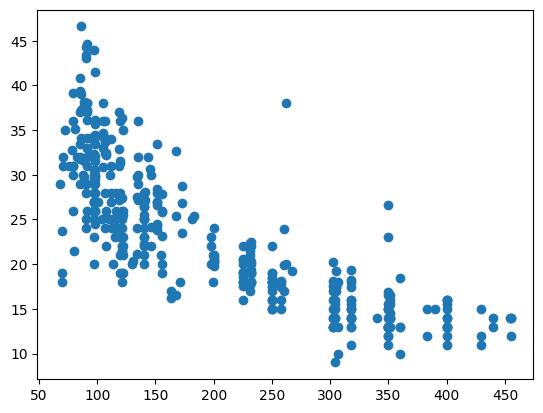

In [ ]:
plt.scatter(df['displacement'],df['mpg'])
plt.show()

In [ ]:
lm = LinearRegression()
X = df[['displacement']]
Y = df['mpg']
lm.fit(X,Y)

LinearRegression()

In [ ]:
lm.score(X,Y)

0.6482294003193044

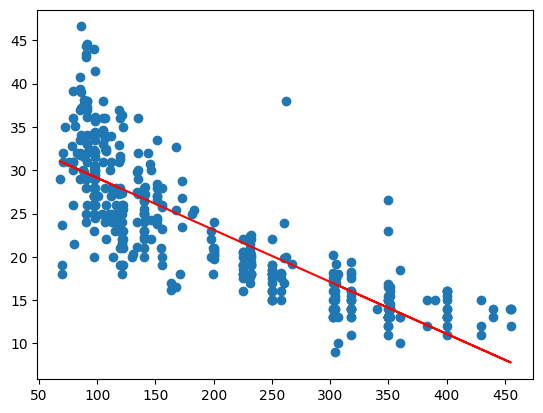

In [ ]:
plt.scatter(df['displacement'],df['mpg'])
plt.plot(X,lm.predict(X),color='red')
plt.show()

In [ ]:
df[(df['displacement']>250 )& ( df['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [ ]:
df[(df['displacement']>300 )& ( df['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [ ]:
df2 = df.drop([395,258,305,372])
df2.shape

(388, 9)

In [ ]:
lm = LinearRegression()
X = df2[['displacement']]
Y = df2['mpg']
lm.fit(X,Y)


LinearRegression()

In [ ]:
lm.score(X,Y)

0.6703131555875477

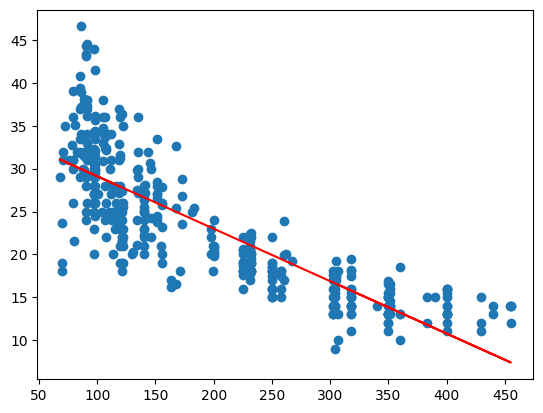

In [ ]:
plt.scatter(df2['displacement'],df2['mpg'])
plt.plot(X,lm.predict(X),color='red')
plt.show()